In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# Read the file from the drive
file_path = '/content/drive/My Drive/FinalDataset.tsv'
df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False)

<ipython-input-4-c4991a1ac648>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, delimiter='\t', error_bad_lines=False)
Skipping line 17089: expected 15 fields, saw 22



In [ ]:
df_clean = df[['star_rating','review_body']]

In [ ]:
df_clean = df_clean.sample(frac=0.01)

df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 19680 to 4799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  199 non-null    int64 
 1   review_body  199 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


,star_rating,review_body
19680,5,This product is not all hype. It works and the...
11448,5,perfect
14316,5,Exactly as described and worked perfectly.
13073,5,awsome
14938,4,DID NOT WORK WITH 2005 Toyota Tacoma PreRunner...


In [ ]:
pip install transformers

In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
!pip install sentencepiece

In [ ]:
# Ensure there are no null values
df_clean.dropna(subset=['review_body'], inplace=True)

# Load pre-trained T5 model and tokenizer
model_name = "t5-small"  # You can choose other versions like "t5-base" or "t5-large" for better results, but they require more memory.
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Function to generate summary
def generate_summary(text):
    input_text = "summarize: " + text
    input_tokenized = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(input_tokenized, max_length=100, min_length=5, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Apply the function to the review_body column
df_clean['summary'] = df_clean['review_body'].apply(generate_summary)

# Display the DataFrame with summaries
print(df_clean)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


       star_rating                                        review_body  \
19680            5  This product is not all hype. It works and the...   
11448            5                                            perfect   
14316            5         Exactly as described and worked perfectly.   
13073            5                                             awsome   
14938            4  DID NOT WORK WITH 2005 Toyota Tacoma PreRunner...   
...            ...                                                ...   
12114            1  Its not two pieces buy only two channels you o...   
18034            5  My work outs have been some pretty intense wor...   
1845             1  I have been using Quicken to track my finances...   
18710            5  The product is well-made! I really liked it, t...   
4799             4  So worth it and even better when you use your ...   

                                                 summary  
19680  this product is not all hype. It works and the...  
11448

In [ ]:
df_clean

,star_rating,review_body,summary
19680,5,This product is not all hype. It works and the...,this product is not all hype. It works and the...
11448,5,perfect,perfect. perfect.
14316,5,Exactly as described and worked perfectly.,Exactly as described and worked perfectly.
13073,5,awsome,awsome awsome
14938,4,DID NOT WORK WITH 2005 Toyota Tacoma PreRunner...,Toyota keymaker gadget (another $15 on Amazon)...
...,...,...,...
12114,1,Its not two pieces buy only two channels you o...,its not two pieces buy only two channels you o...
18034,5,My work outs have been some pretty intense wor...,my work outs have been some pretty intense wor...
1845,1,I have been using Quicken to track my finances...,Quicken is becoming increasingly frustrating t...
18710,5,"The product is well-made! I really liked it, t...",my main use of it is for the area between the ...


In [ ]:
df_clean.to_csv("summarized_text.csv")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
## This is not required, kindly ignore

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english', max_features=10)

# Fit and transform the reviews
tfidf_matrix = vectorizer.fit_transform(df_clean['review_body'])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Extract top keywords for each review
df_clean['keywords'] = [sorted([(feature_names[col], tfidf_matrix[row, col]) for col in tfidf_matrix[row].nonzero()[1]], key=lambda x: x[1], reverse=True)[:3] for row in range(tfidf_matrix.shape[0])]

print(df_clean)

       star_rating                                        review_body  \
19680            5  This product is not all hype. It works and the...   
11448            5                                            perfect   
14316            5         Exactly as described and worked perfectly.   
13073            5                                             awsome   
14938            4  DID NOT WORK WITH 2005 Toyota Tacoma PreRunner...   
...            ...                                                ...   
12114            1  Its not two pieces buy only two channels you o...   
18034            5  My work outs have been some pretty intense wor...   
1845             1  I have been using Quicken to track my finances...   
18710            5  The product is well-made! I really liked it, t...   
4799             4  So worth it and even better when you use your ...   

                                                 summary  \
19680  this product is not all hype. It works and the...   
114

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim import corpora, models

In [ ]:
pip install nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english', max_features=10)

# Fit and transform the reviews
tfidf_matrix = vectorizer.fit_transform(df_clean['review_body'])

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Extract top keywords for each review
df_clean['keywords'] = [sorted([(feature_names[col], tfidf_matrix[row, col]) for col in tfidf_matrix[row].nonzero()[1]], key=lambda x: x[1], reverse=True)[:3] for row in range(tfidf_matrix.shape[0])]

# Preprocessing for LDA
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    return tokens

tokenized_reviews = [preprocess(review) for review in df_clean['review_body']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)

print(df_clean)



(0, '0.017*"great" + 0.012*"br" + 0.012*"good"')
(1, '0.053*"br" + 0.031*"windows" + 0.013*"10"')
(2, '0.028*"br" + 0.020*"n\'t" + 0.015*"would"')
       star_rating                                        review_body  \
19680            5  This product is not all hype. It works and the...   
11448            5                                            perfect   
14316            5         Exactly as described and worked perfectly.   
13073            5                                             awsome   
14938            4  DID NOT WORK WITH 2005 Toyota Tacoma PreRunner...   
...            ...                                                ...   
12114            1  Its not two pieces buy only two channels you o...   
18034            5  My work outs have been some pretty intense wor...   
1845             1  I have been using Quicken to track my finances...   
18710            5  The product is well-made! I really liked it, t...   
4799             4  So worth it and even better wh

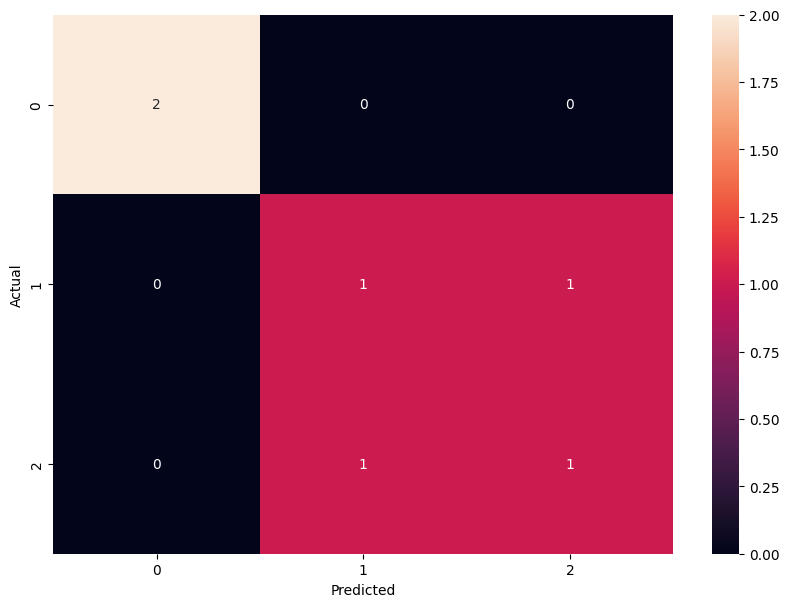

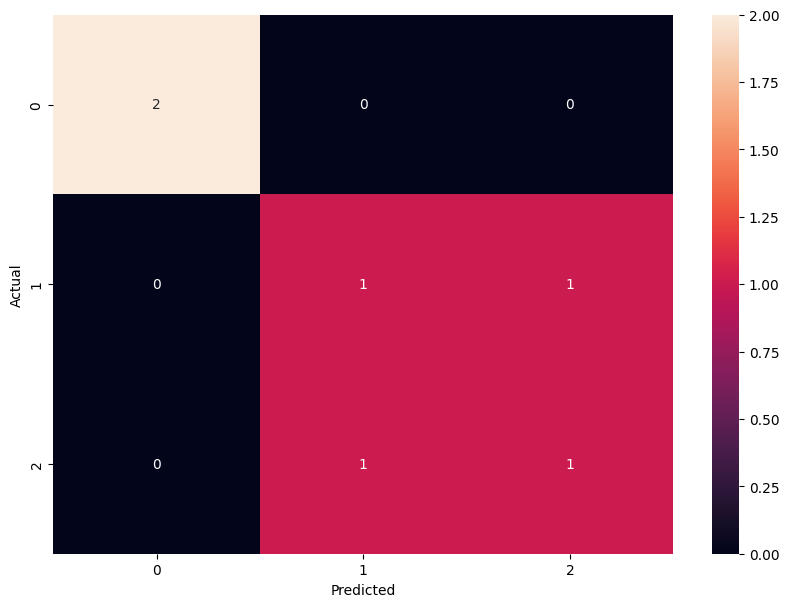

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample values for demonstration
y_true = np.array([1, 0, 1, 2, 2, 0])
y_pred = np.array([1, 0, 2, 2, 1, 0])

labels = list(set(y_true) | set(y_pred))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sample_text = "I love this product!"
score = sia.polarity_scores(sample_text)
print(score)

{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from transformers import pipeline


# Initialize sentiment analysis pipeline
nlp = pipeline("sentiment-analysis")

def get_sentiment_and_score(text):
    # Truncate the text to fit within the model's limit
    text = text[:500]  # Truncate to a bit less than 512 to be safe
    result = nlp(text)[0]
    return result['label'], result['score']

# Apply sentiment analysis on the review_body column with truncation
df_clean['sentiment'], df_clean['sentiment_score'] = zip(*df_clean['review_body'].apply(get_sentiment_and_score))

print(df_clean)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


       star_rating                                        review_body  \
19680            5  This product is not all hype. It works and the...   
11448            5                                            perfect   
14316            5         Exactly as described and worked perfectly.   
13073            5                                             awsome   
14938            4  DID NOT WORK WITH 2005 Toyota Tacoma PreRunner...   
...            ...                                                ...   
12114            1  Its not two pieces buy only two channels you o...   
18034            5  My work outs have been some pretty intense wor...   
1845             1  I have been using Quicken to track my finances...   
18710            5  The product is well-made! I really liked it, t...   
4799             4  So worth it and even better when you use your ...   

                                                 summary  \
19680  this product is not all hype. It works and the...   
114

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis on the review_body column
df_clean['sentiment_scores_vader'] = df_clean['review_body'].apply(lambda x: sia.polarity_scores(x))

print(df_clean)

       star_rating                                        review_body  \
19680            5  This product is not all hype. It works and the...   
11448            5                                            perfect   
14316            5         Exactly as described and worked perfectly.   
13073            5                                             awsome   
14938            4  DID NOT WORK WITH 2005 Toyota Tacoma PreRunner...   
...            ...                                                ...   
12114            1  Its not two pieces buy only two channels you o...   
18034            5  My work outs have been some pretty intense wor...   
1845             1  I have been using Quicken to track my finances...   
18710            5  The product is well-made! I really liked it, t...   
4799             4  So worth it and even better when you use your ...   

                                                 summary  \
19680  this product is not all hype. It works and the...   
114

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_clean.to_csv("summarized_text_extractiom.csv")